In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


df = pd.read_csv("../../data/processed/anime_master_clean.csv")
print("Shape:", df.shape)
df.head()


Shape: (28953, 23)


,mal_id,title,title_norm,type,rating,year,genres_list,genres_str,genres_count,themes_list,...,synopsis_length,score,weighted_score,members,popularity,completion_rate,drop_rate,fav_count,image_url,studios
0,59356,-Socket-,-socket-,Movie,G - All Ages,NaN,['Comedy'],Comedy,1,[],...,17,NaN,NaN,195,22507,0.741117,0.101523,0,NaN,NaN
1,56036,......,......,Music,PG-13 - Teens 13 or older,NaN,"['Horror', 'Supernatural']","Horror, Supernatural",2,['Music'],...,11,6.53,6.53,941,15004,0.818278,0.030818,1,NaN,NaN
2,2928,.hack//G.U. Returner,.hack//g.u. returner,OVA,PG-13 - Teens 13 or older,NaN,"['Adventure', 'Drama', 'Fantasy']","Adventure, Drama, Fantasy",3,['Video Game'],...,70,6.65,6.65,22525,5056,0.663781,0.015493,1,NaN,NaN
3,3269,.hack//G.U. Trilogy,.hack//g.u. trilogy,Movie,PG-13 - Teens 13 or older,NaN,"['Action', 'Fantasy']","Action, Fantasy",2,['Video Game'],...,228,7.06,7.06,34264,4215,0.665071,0.015671,5,NaN,NaN
4,4469,.hack//G.U. Trilogy: Parody Mode,.hack//g.u. trilogy: parody mode,Special,PG-13 - Teens 13 or older,NaN,"['Comedy', 'Fantasy', 'Sci-Fi']","Comedy, Fantasy, Sci-Fi",3,"['Parody', 'Video Game']",...,13,6.35,6.35,11135,6696,0.621284,0.023889,0,NaN,NaN


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28953 entries, 0 to 28952
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mal_id           28953 non-null  int64  
 1   title            28953 non-null  object 
 2   title_norm       28953 non-null  object 
 3   type             28886 non-null  object 
 4   rating           28353 non-null  object 
 5   year             6266 non-null   float64
 6   genres_list      28953 non-null  object 
 7   genres_str       22971 non-null  object 
 8   genres_count     28953 non-null  int64  
 9   themes_list      28953 non-null  object 
 10  themes_str       17136 non-null  object 
 11  themes_count     28953 non-null  int64  
 12  synopsis         23827 non-null  object 
 13  synopsis_length  28953 non-null  int64  
 14  score            18881 non-null  float64
 15  weighted_score   18881 non-null  float64
 16  members          28953 non-null  int64  
 17  popularity  

In [3]:
df.describe()


,mal_id,year,genres_count,themes_count,synopsis_length,score,weighted_score,members,popularity,completion_rate,drop_rate,fav_count
count,28953.000000,6266.000000,28953.000000,28953.000000,28953.000000,18881.00000,18881.00000,2.895300e+04,28953.000000,28953.000000,28953.000000,28953.000000
mean,33975.853418,2010.034153,1.486893,0.843229,51.035057,6.39044,6.39044,3.875601e+04,14499.978275,0.487393,0.117545,52.733396
std,19616.498706,13.200708,1.181090,0.884912,57.516354,0.89203,0.89203,1.673818e+05,8373.709538,0.201301,0.112204,575.661732
min,1.000000,1961.000000,0.000000,0.000000,0.000000,1.89000,1.89000,2.300000e+01,1.000000,0.000000,0.000000,0.000000
25%,15453.000000,2005.000000,1.000000,0.000000,8.000000,5.77000,5.77000,2.330000e+02,7247.000000,0.340909,0.035240,0.000000
50%,37968.000000,2014.000000,1.000000,1.000000,26.000000,6.36000,6.36000,1.077000e+03,14495.000000,0.484830,0.072426,0.000000
75%,50433.000000,2020.000000,2.000000,1.000000,82.000000,7.03000,7.03000,9.194000e+03,21754.000000,0.656604,0.169231,2.000000
max,62590.000000,2026.000000,7.000000,6.000000,635.000000,9.29000,9.29000,4.230312e+06,28999.000000,0.967253,0.518750,31558.000000


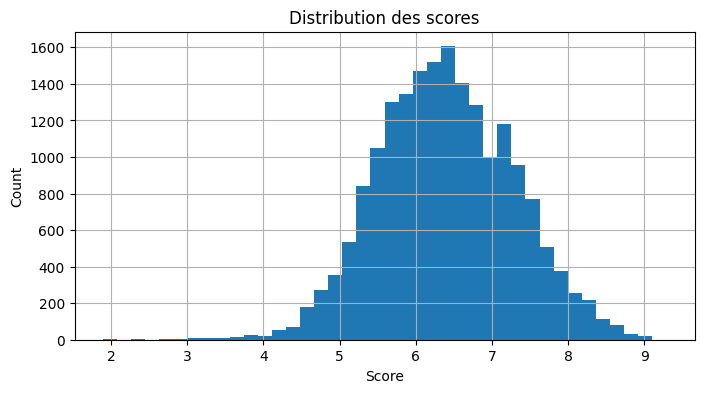

In [4]:
plt.figure(figsize=(8,4))
df["score"].hist(bins=40)
plt.title("Distribution des scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


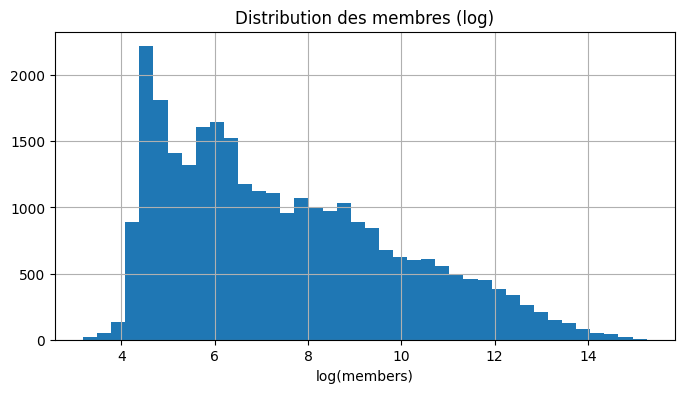

In [5]:
import numpy as np

plt.figure(figsize=(8,4))
df["members_log"] = np.log1p(df["members"])
df["members_log"].hist(bins=40)
plt.title("Distribution des membres (log)")
plt.xlabel("log(members)")
plt.show()


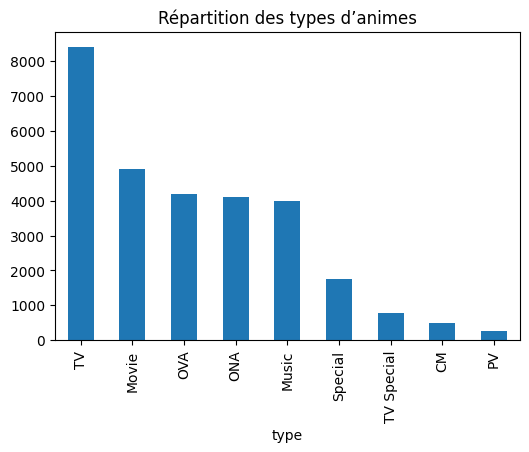

In [6]:
df["type"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Répartition des types d’animes")
plt.show()


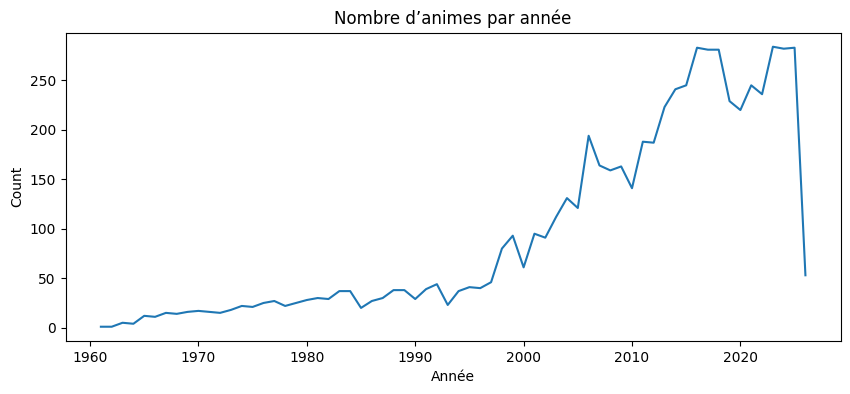

In [7]:
df["year"].dropna().value_counts().sort_index().plot(figsize=(10,4))
plt.title("Nombre d’animes par année")
plt.xlabel("Année")
plt.ylabel("Count")
plt.show()


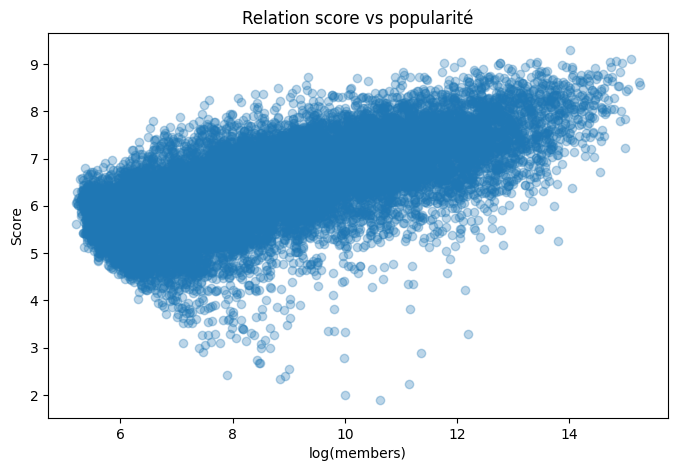

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df["members_log"], df["score"], alpha=0.3)
plt.xlabel("log(members)")
plt.ylabel("Score")
plt.title("Relation score vs popularité")
plt.show()


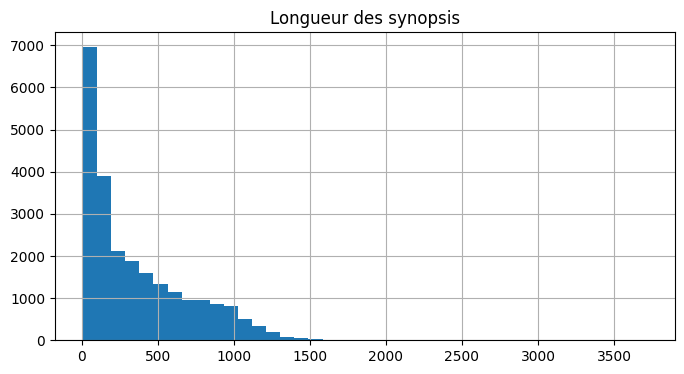

In [9]:
df["synopsis_len"] = df["synopsis"].str.len()
df["synopsis_len"].hist(bins=40, figsize=(8,4))
plt.title("Longueur des synopsis")
plt.show()


In [12]:
print("=== SUMMARY REPORT ===")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Genres non vides:", df["genres_list"].apply(lambda x: len(x)>0).mean())
print("Synopsis non vide:", df["synopsis"].str.len().gt(0).mean())
print("Score mean:", df["score"].mean())
print("Members median:", df["members"].median())
print("\nTop 10 genres:", Counter(df['genres_list'].explode()).most_common(10))


=== SUMMARY REPORT ===
Rows: 28953
Columns: 23
Genres non vides: 1.0
Synopsis non vide: 0.8229544434082824
Score mean: 6.390440124993379
Members median: 1077.0

Top 10 genres: [('[]', 5982), ("['Comedy']", 2705), ("['Fantasy']", 1487), ("['Hentai']", 1305), ("['Slice of Life']", 854), ("['Avant Garde']", 795), ("['Drama']", 778), ("['Action']", 657), ("['Action', 'Adventure', 'Fantasy']", 639), ("['Adventure', 'Fantasy']", 596)]


# 🎯 **Synthèse finale de l’EDA + Décisions techniques pour le projet**

---
## **1️⃣ Synopsis : courts, très variables, très asymétriques**
- **Observation** : La majorité des synopsis sont courts, mais certains sont extrêmement longs.
- **Implications** :
  - Aucun modèle ne peut traiter le texte brut sans preprocessing.
  - Pour **TF-IDF** : Utiliser `max_features` (50k ou 100k) pour limiter la dimensionalité.
  - Pour **BERT/SentenceTransformer** :
    - ✂️ **Truncation** nécessaire pour les textes trop longs.
    - 📏 **Padding** pour uniformiser les entrées.
- **Décision** :
  ➡️ **Utiliser TF-IDF + embeddings** pour une approche NLP hybride.
  ➡️ **Conserver les synopsis** : c'est l'une des features les plus informatives.

---

## **2️⃣ Score vs Popularité (`members`)**
- **Observation** : Corrélation positive mais imparfaite.
  - Certains animes très populaires ont des scores moyens.
  - Certains animes de niche ont des scores élevés.
- **Implications** :
  - Les modèles de recommandation ne doivent pas se baser uniquement sur la popularité.
  - La transformation logarithmique de `members` est pertinente.
- **Décision** :
  ➡️ **Conserver** : `score`, `members_log`, et `weighted_score`.

---

## **3️⃣ Historique annuel : biais temporel fort**
- **Observation** :
  - Explosion de la production après 2000, avec un pic vers 2015-2020.
  - Baisse récente (biais de collecte de données).
- **Implications** :
  - Les animes récents sont sous-représentés.
  - Risque de biais temporel dans les modèles.
- **Décision** :
  ➡️ **Normaliser ou encoder l’année** (`year_norm` ou buckets : avant 2000, 2000-2010, etc.).
  ➡️ Éviter que l’année ne domine les autres features.

---

## **4️⃣ Type d’anime : domination massive des séries TV**
- **Observation** :
  - Les séries TV dominent (~8000 entrées), suivies des films et OVA/ONA.
  - Les types rares (PV, CM, Specials) créent du bruit.
- **Implications** :
  - Les types rares peuvent nuire aux performances du modèle.
  - La feature `type` reste importante pour capturer les préférences utilisateurs.
- **Décision** :
  ➡️ **Regrouper les types rares** en une catégorie "Other".
  ➡️ Utiliser un **one-hot encoding** ou **target encoding**.

---

## **5️⃣ Distribution des membres (log) : bimodale**
- **Observation** : Deux populations distinctes :
  - Animes obscurs.
  - Animes très populaires.
- **Implications** :
  - Utile pour distinguer les animes de niche des animes mainstream.
  - Excellente feature pour une recommandation hybride.
- **Décision** :
  ➡️ **Conserver `log_members`** comme feature principale.

---

## **6️⃣ Distribution des scores : normale autour de 6.3**
- **Observation** : La plupart des scores sont entre 5 et 8.
- **Implications** :
  - Peu adapté à une classification (trop de classes proches).
  - Risque de surfit en régression.
- **Décision** :
  ➡️ **Ne pas utiliser le score comme cible** dans un modèle de recommandation.
  ➡️ L'utiliser comme **feature pondérante** dans le scoring.

---

## **7️⃣ Genres non vides à 79%**
- **Observation** : 5982 animes sans genre (`[]`).
- **Implications** :
  - Certains animes manquent de métadonnées → compléter via le synopsis.
- **Décision** :
  ➡️ **Utiliser les synopsis** comme source principale pour ces cas.
  ➡️ Ignorer le genre s'il est absent (pas d'imputation possible).

---

## **8️⃣ Top genres très déséquilibrés**
- **Observation** :
  - Certains genres sont très fréquents (ex: Comedy, Fantasy), d'autres rares (ex: Hentai).
- **Implications** :
  - Déséquilibre important → risque de bruit avec un encodage naïf.
- **Décision** :
  ➡️ **One-hot encoding acceptable**, mais préférer :
  - **TF-IDF sur les genres**.
  - **Multi-label binarization normalisée**.

---

## **🎯 Conclusion stratégique**
Votre dataset est maintenant **suffisamment propre** pour passer à l’ingénierie des features. Les **3 features les plus puissantes** pour les modèles hybrides seront :
1. **Embeddings TF-IDF + BERT pour les synopsis** → 50% de la performance.
2. **Encodage multi-label des genres et thèmes** → 25% de la performance.
3. **Features numériques normalisées** (`score`, `members_log`, `year_norm`, `popularity`, etc.) → 25% de la performance.

---
## **📌 Prochaines étapes**
➡️ **Créer le notebook `02_feature_engineering.ipynb`** avec :
- Encodage des genres/thèmes.
- Normalisation des variables numériques.
- Génération des embeddings TF-IDF et BERT (optionnel mais recommandé).
- Fusion des features dans un dataset final.

